In [59]:
import numpy as np
import matplotlib.pyplot as plt

X = np.zeros((150,2))

np.random.seed(seed=42)
X [:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X [:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X [50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X [50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X [100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X [100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)


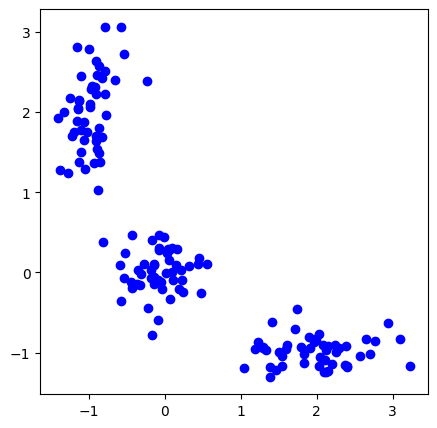

In [60]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

In [61]:
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

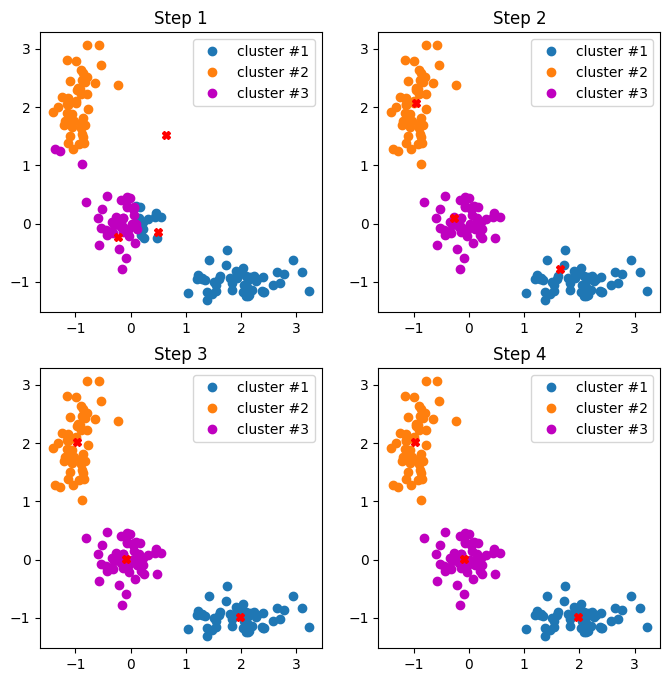

In [62]:
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'o', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'o', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

4


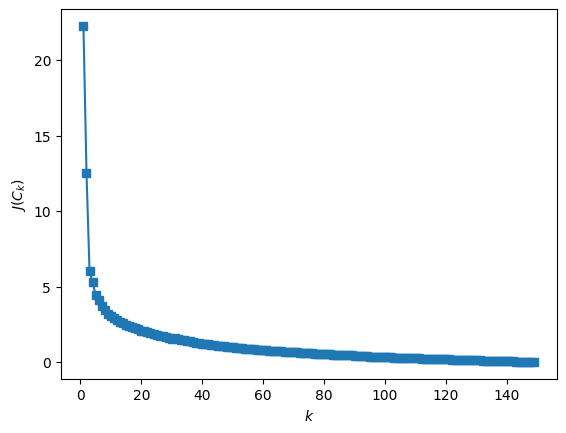

In [84]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 150):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

neededK = 1
for k in range(1,149):
    if abs(inertia[k] - inertia[k+1]) < 0.4:
        neededK = k
        break
print(neededK)
plt.plot(range(1, 150), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');


In [85]:

np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=neededK*2)
centroids = centroids.reshape((neededK,2))

cent_history = []
cent_history.append(centroids)

for i in range(neededK):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)
    print(i)
    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    for j in range(neededK):
        centroids[j, :] = np.mean(X[labels == j, :], axis=0)
        

    cent_history.append(centroids)

0
1
2
3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

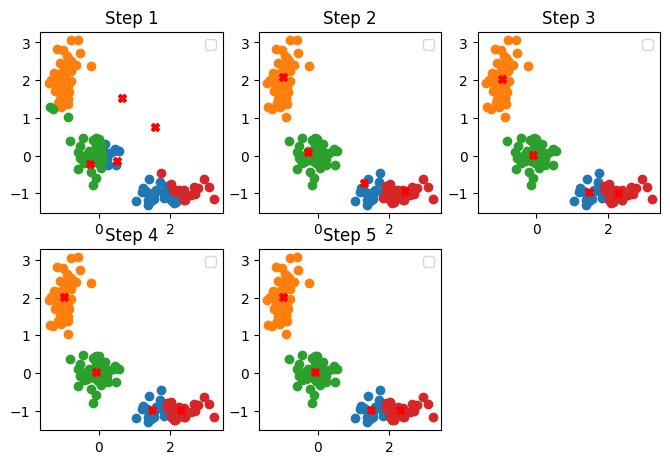

In [86]:

plt.figure(figsize=(8,8))

for i in range(9):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(3, 3, i + 1)
    for j in range(neededK):
        plt.scatter(X[labels == j, 0], X[labels == j, 1])
    
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));